---
title: "Michealis Menten approx - multi binding enzyme"
format: html
A model for bistability
---

In [2]:
import tellurium as te
te.setDefaultPlottingEngine('matplotlib')

In [77]:
r = te.loada('''
model mmMultiBindingEnzymaticReaction()
    compartment C1;
    C1 = 1.0;
    species S, P;

    S = 2.31e-03; #in [M]
    P = 0;
    E = 4.15e-05; #in [M]
    ES = 0.0;
    SE = 0.0;
    SES = 0.0;
    S in C1; P in C1; E in C1; ES in C1; SE in C1; SES in C1
    J1: S + E -> ES; kf*S*E;
    J2: ES -> S + E; kr*ES;
    J3: ES -> E + P; kcat*ES;
             
    J4: S + E -> SE; kf1*S*E;
    J5: SE -> S + E; kr1*SE;     
    J6: SE -> E + P; kcat1*SE;
             
    J7: S + ES -> SES; kf2*S*ES;
    J8: SES -> S + ES; kr2*SES;
    J9: SES -> ES + P; kcat2*SES;
             
    J10: S + SE -> SES; kf3*S*SE;
    J11: SES -> S + SE; kr3*SES;
    J12: SES -> SE + P; kcat3*SES;
             
    J13: P -> S; P*kdeg;

    kdeg = 100; #in [min-1]
    
    #ES
    kf = 10^8; #in [M-1min-1]
    Keq = 10000; 
    kr := kf/Keq; #in [min-1]
    kcat = 1*1e+5; #in [min-1]

    #SE    
    kf1 = 10^8;
    Keq1 = 10000;
    kr1 := kf/Keq;
    kcat1 = 1.5*1e+5;

    #SES from/to ES         
    kf2 = 10^8;
    Keq2 = 10000;
    kr2 := kf/Keq;
    kcat2 = 10^3;

    #SES from/to SE       
    kf3 = 10^8;
    Keq3 = 10000;
    kr3 := kf/Keq;
    kcat3 = 10^3;
          
end
''')

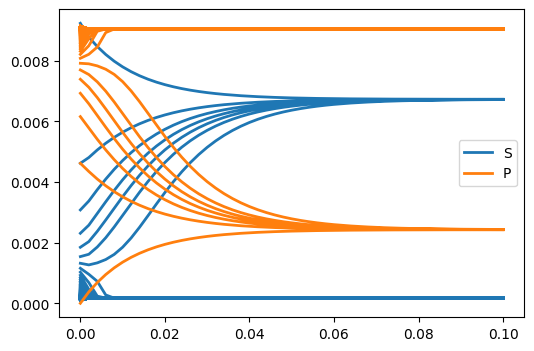

In [87]:
# run a simulation, stop after reaching or passing time (in min) 0.1
for k in range(1,100):
    r.reset()
    r.kdeg=100;
    r.S = 4*2.31e-03/k #in [M]
    r.P = 4*2.31e-03 - r.S #in [M]
    results = r.simulate(0, 0.1, ['time', 'S', 'P'])
    # plot the simulation
    r.plot(show=False)
te.show()